# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

### Import dependencies

In [1]:
# Dependencies
import json
import time
start_time = time.time()
import pickle
import os
import random
import cv2
import argparse
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import numpy as np
import matplotlib.gridspec as gridspec
import csv

### Set up global parameters

In [2]:
filepath = os.getcwd()

# Parameters
EPOCHS = 10
BATCH_SIZE = 128
rate =  0.0005
mu = 0
sigma = 0.1
dropout = 0.2
seed = 1234

h1_size = 512
h2_size = 128
filters_1 = 64
filters_2 = 64
filters_3 = 64

### Load data

In [3]:
#Load the data

data_dir = os.path.join(filepath, 'data', 'processed')
training_file = os.path.join(data_dir, "train.p")
validation_file= os.path.join(data_dir, "valid.p")
testing_file = os.path.join(data_dir, "test.p")
augmented_file = os.path.join(data_dir, "augmented_rotated.p")

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(augmented_file, mode='rb') as f:
    augmented = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
# You can load augmented data directly if it has been saved
X_augmented, y_augmented = augmented['features'], augmented['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

n_valid = X_valid.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print("Original training set size: %d " % X_train.shape[0])
print("Augmented data set size: %d" % X_augmented.shape[0])

print("Merging augmented and real pictures")
X_train = np.concatenate([X_train, X_augmented])
y_train = np.concatenate([y_train, y_augmented])

print("Dataset size: %d " % X_train.shape[0])
print("Label size: %d " % y_train.shape[0])

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (34799, 32, 32, 3)
Number of classes = 43
Original training set size: 34799 
Augmented data set size: 173996
Merging augmented and real pictures
Dataset size: 208795 
Label size: 208795 


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

(array([  1080.,  11880.,  12060.,   7560.,  10620.,   9900.,   2160.,
          7740.,   7560.,   7920.,  10800.,   7020.,  11340.,  11520.,
          4140.,   3240.,   2160.,   5940.,   6480.,   1080.,   1800.,
          1620.,   1980.,   2700.,   1440.,   8100.,   3240.,   1260.,
          2880.,   1440.,   2340.,   4140.,   1260.,   3594.,   2160.,
          6480.,   1980.,   1080.,  11160.,   1620.,   1800.,   1261.,
          1260.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.209

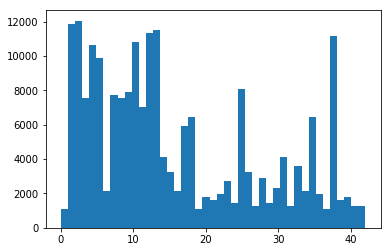

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.hist(y_train, bins = n_classes)

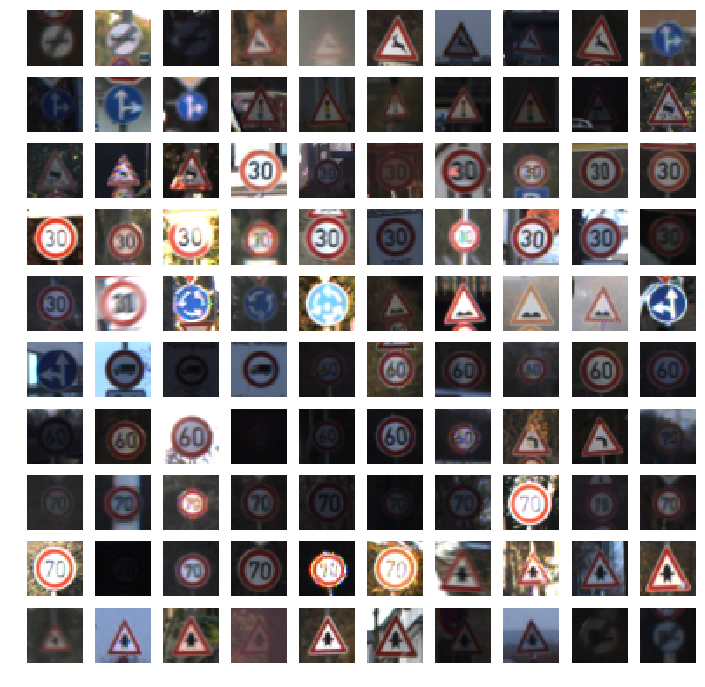

In [6]:
grid = gridspec.GridSpec(10, 10)
plt.figure(figsize=(12,12))
for i in range(100):
    img = X_train[100*i]
    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
#print("Normalizing")
#X_train = np.array(X_train / 255.0 - 0.5 )
#X_test = np.array(X_test / 255.0 - 0.5 )
#X_valid = np.array(X_valid / 255.0 - 0.5 )

#Data augmentation

def bright_aug(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = 1 + 0.85*np.random.uniform(-1,1)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def augment(img):
    
    # Rotating
    ang_rot = np.random.uniform(20)- 10
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
    # Translating
    tr_x = 5*np.random.uniform()- 2.5
    tr_y = 5*np.random.uniform()- 2.5
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    # Shearing
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+10*np.random.uniform()- 5
    pt2 = 20+10*np.random.uniform()- 5
    # Brightness
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    img = bright_aug(img)

    return img

# aug = 5
# X_augmented = X_train[0:1]
# y_augmented = y_train[0:1]
# X_train.shape[0]


# for j in range(X_train.shape[0]):
#     print("Currently processing picture %d out of %d" % (j,X_train.shape[0]))
#     image = X_train[j]
#     label = y_train[j]
#     X_augment = np.empty([aug,32,32,3], dtype=np.uint8)
#     y_augment = np.empty(aug)
#     for i in range(aug):
#         img = transform_image(image,20,10,5,brightness=1)
#         X_augment[i] = img
#         y_augment[i] = label
#     X_augmented = np.concatenate([X_augmented,X_augment])
#     y_augmented = np.concatenate([y_augmented,y_augment])

# print("Wrapping up")
# augmented_data = {'features' : X_augmented, 'labels' : y_augmented}
# print("Saving augmented pictures")
# augmented_file = os.path.join(data_dir, "augmented_rotated.p")
# pickle.dump(augmented_data, open(augmented_file,"wb"))

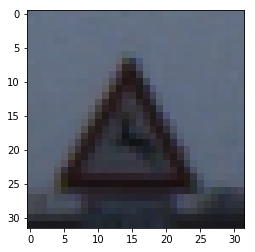

In [8]:
plt.imshow(X_train[600])

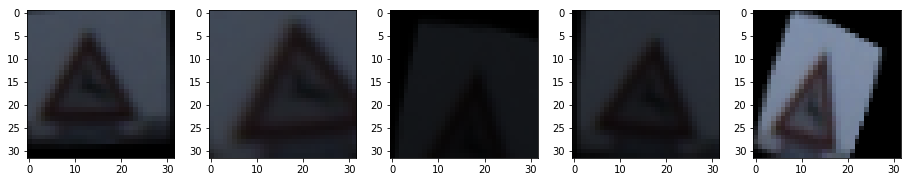

In [9]:
plt.figure(figsize=(32,32))
for i in range(5):
    img = augment(X_train[600])
    plt.subplot(10,10,i+1)
    plt.imshow(img)
    
plt.show()

In [10]:
#Shuffle 
X_train, y_train = shuffle(X_train, y_train, random_state=seed)

### Model Architecture

In [11]:
def ProNet(x):    
    # 1x1 convolution to transform the color channels
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1,1,3,1), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros(1))
    conv0 = tf.nn.conv2d(x, conv0_W, strides=[1,1,1,1],padding='SAME') + conv0_b
    conv0 = tf.nn.relu(conv0)
    # 3x3x64 kernels
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, filters_1), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(filters_1))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b
    conv1 = tf.nn.relu(conv1)
    # 3x3x64 kernels
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, filters_1, filters_2), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(filters_2))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    conv2 = tf.nn.relu(conv2)
    # 3x3x64 kernels
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, filters_2, filters_3), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(filters_3))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    conv3 = tf.nn.relu(conv3)
    pool = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    # Fully connected 1
    fc0 = flatten(pool)
    fc1_W = tf.Variable(tf.truncated_normal(shape=(16*16*filters_3, h1_size), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(h1_size))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    # Fully connected 2
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(h1_size, h2_size), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(h2_size))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    # Output and regularization
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(h2_size, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    l2_loss = 0.01*tf.nn.l2_loss(fc1_W) + 0.01*tf.nn.l2_loss(fc2_W) + 0.01*tf.nn.l2_loss(fc3_W)
    
    return logits, l2_loss

### Train, Validate and Test the Model

In [12]:
# Placeholders and optimization scheme
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32, (None))
logits, l2_loss = ProNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + l2_loss
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Print number of parameters
total_parameters = 0
for variable in tf.trainable_variables():
    shape = variable.get_shape()
    variable_parameters = 1
    for dim in shape:
        variable_parameters *= dim.value
        total_parameters += variable_parameters 

In [13]:
# Train the model   
with tf.Session() as sess:
    tf.set_random_seed(seed)

    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print('There is a total of %d parameters to estimate' % total_parameters) 
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        
    saver.save(sess, './pronet')
    print("Model saved")

print("--- %s seconds to run ---" % (time.time() - start_time))

There is a total of 8553057 parameters to estimate
Training...
EPOCH 1 ...
Validation Accuracy = 0.583
EPOCH 2 ...
Validation Accuracy = 0.821
EPOCH 3 ...
Validation Accuracy = 0.924
EPOCH 4 ...
Validation Accuracy = 0.962
EPOCH 5 ...
Validation Accuracy = 0.976
EPOCH 6 ...
Validation Accuracy = 0.969
EPOCH 7 ...
Validation Accuracy = 0.982
EPOCH 8 ...
Validation Accuracy = 0.981
EPOCH 9 ...
Validation Accuracy = 0.982
EPOCH 10 ...
Validation Accuracy = 0.979
Model saved
--- 1914.1620140075684 seconds to run ---


A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
# Evaluate on test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    training_accuracy = evaluate(X_train, y_train)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Training Accuracy = {:.3f}".format(training_accuracy))

Test Accuracy = 0.958
Training Accuracy = 0.958


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

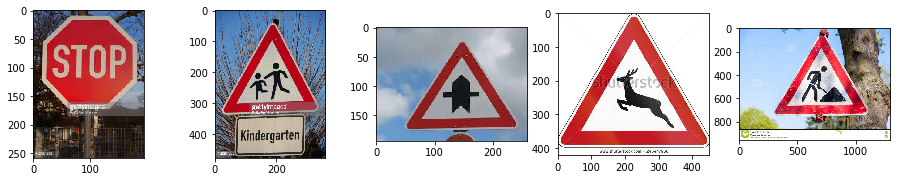

In [15]:
img1 = cv2.imread(os.path.join(filepath,'examples','sign1.png'))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(os.path.join(filepath,'examples','sign2.png'))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread(os.path.join(filepath,'examples','sign3.png'))
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4 = cv2.imread(os.path.join(filepath,'examples','sign4.png'))
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5 = cv2.imread(os.path.join(filepath,'examples','sign5.png'))
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

imgs = [img1,img2,img3,img4,img5]

plt.figure(figsize=(32,32))
for i in range(5):
    img = imgs[i]
    plt.subplot(10,10,i+1)
    plt.imshow(img)
    
plt.show()

### Predict the Sign Type for Each Image

In [16]:
img1 = cv2.resize(img1,(32, 32))
img2 = cv2.resize(img2,(32, 32))
img3 = cv2.resize(img3,(32, 32))
img4 = cv2.resize(img4,(32, 32))
img5 = cv2.resize(img5,(32, 32))

X_extra = np.stack([img1,img2,img3,img4,img5])
y_extra = np.array([14,28,11,31,25])

def extra(X_data, sess): 
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data, keep_prob: 1.0})    
    top_5 = tf.nn.top_k(prob, k=5)
    return sess.run(top_5)


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    signs_top_5=extra(X_extra, sess)
    
signs_top_5[1]

array([[14,  1,  0,  3,  2],
       [25, 11, 30, 28, 20],
       [25, 28, 27, 11, 30],
       [22, 30, 25, 31, 29],
       [25, 20, 27, 11, 28]])

In [17]:
labels=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        labels.append((row['SignName']))

print("The predicted labels are:")
print([labels[j] for j  in [i[0] for i in signs_top_5[1]]])

print("The actual labels are:")
print([labels[j] for j in y_extra])


The predicted labels are:
['Stop', 'Road work', 'Road work', 'Bumpy road', 'Road work']
The actual labels are:
['Stop', 'Children crossing', 'Right-of-way at the next intersection', 'Wild animals crossing', 'Road work']


In [18]:
extra_acc = (np.array([i[0] for i in signs_top_5[1]])  == y_extra).mean()

### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print("The accuracy on out of sample images is: "+ str(extra_acc*100) + '%')

The accuracy on out of sample images is: 40.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

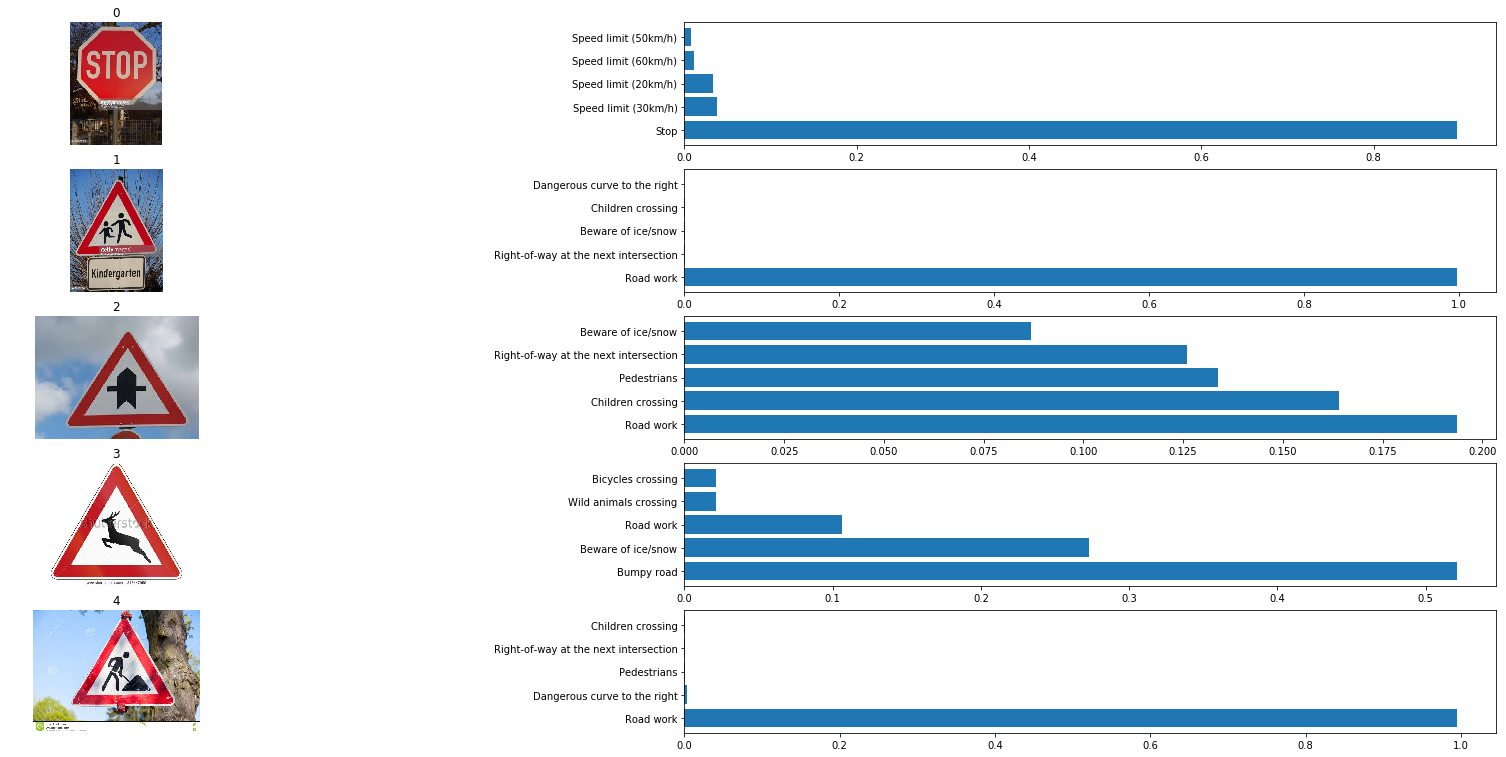

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

plt.figure(figsize=(32, 32))
for i in range(5):
    plt.subplot(12, 2, 2*i+1)
    plt.imshow(imgs[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(12, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), signs_top_5.values[i, :])
    labs=[labels[j] for j in signs_top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()




> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 